In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=iris.target

In [9]:
df['flower_name']=df['target'].apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

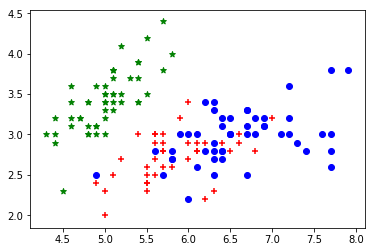

In [16]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='o')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=df.drop(['target','flower_name'],axis=1)
y=df['target']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [20]:
from sklearn.svm import SVC

In [55]:
model=SVC(gamma='auto')

In [56]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
model.score(x_test,y_test)

0.9666666666666667

In [63]:
import pickle
outfile=open('iris_model.pkl','wb')
pickle.dump(model,outfile)

In [65]:
infile=open('iris_model.pkl','rb')
modelss=pickle.load(infile)

In [66]:
v=modelss.predict([[91,6.1,3,4]])[0]
iris.target_names[v]

'virginica'

In [50]:
from sklearn.linear_model import LogisticRegression
m=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=150)

In [51]:
m.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
m.score(x_test,y_test)

0.9666666666666667

In [59]:
v=m.predict([[91,6.1,3,4]])[0]
iris.target_names[v]

'versicolor'